# Machine Learning Home Work 1|
- Author： Wenqi Hu, Shanshan Liu

## Import packages
- tree function is build by sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import os

## Define the key function
First define the key function that can test the influence of depth in decision tree


In [2]:
def depth_test(train_X,train_Y,valid_X,valid_Y,max_depth):
    train_err=[]
    valid_err=[]
    for i in range(1,max_depth+1):
        clf = tree.DecisionTreeClassifier(max_depth=i)
        clf = clf.fit(train_X, train_Y)
        pred_train=clf.predict(train_X)
        pred_valid=clf.predict(valid_X)
        train_err.append(sum(pred_train!=train_Y.iloc[:,0])/train_Y.shape[0])
        valid_err.append(sum(pred_valid!=valid_Y.iloc[:,0])/valid_Y.shape[0])
    return train_err,valid_err

## Load data for Madelon

In [3]:
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\MADELON')
train_X=pd.read_csv('madelon_train.data',sep=' ',header=None)
train_Y=pd.read_csv('madelon_train.labels',header=None)
valid_X=pd.read_csv('madelon_valid.data',sep=' ',header=None)
valid_Y=pd.read_csv('madelon_valid.labels',header=None)

train_X=train_X.iloc[:,:-1]
valid_X=valid_X.iloc[:,:-1]

## Run function and plot for Madelon
- test deepth in 1-12


             max_pred_err_depth  Error_velue
test_error                    6     0.201667
train_error                   6     0.088000


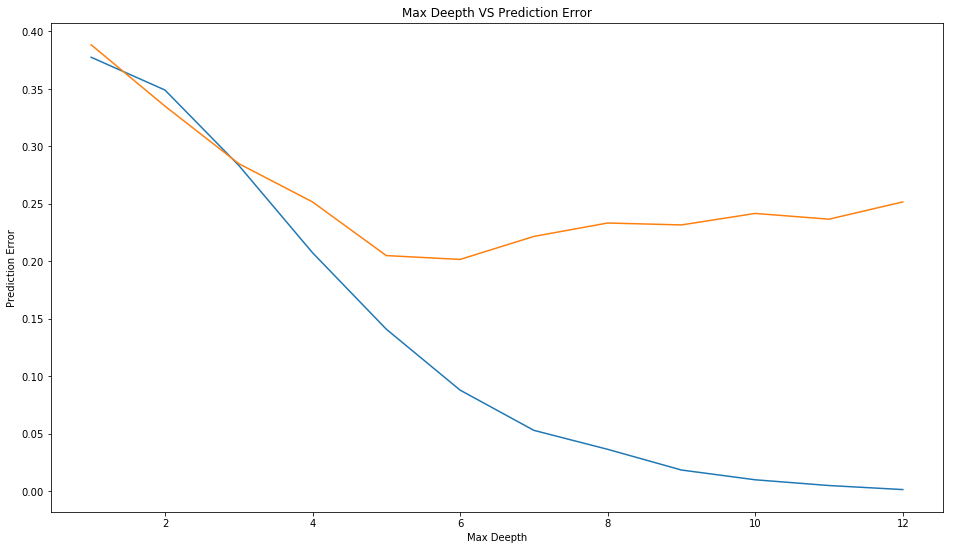

In [9]:

train_err,valid_err=depth_test(train_X,train_Y,valid_X,valid_Y,12)
depth=np.array(range(1,13))
Min_pred_table=pd.DataFrame([[depth[valid_err==min(valid_err)][0],min(valid_err)],[depth[valid_err==min(valid_err)][0],np.array(train_err)[valid_err==min(valid_err)][0]]])
Min_pred_table.columns=['max_pred_err_depth','Error_velue']
Min_pred_table.index=['test_error','train_error']
print(Min_pred_table)
plt.figure(figsize=(16,9))  
plt.plot(depth,train_err)
plt.plot(depth,valid_err)
plt.title('Max Deepth VS Prediction Error')
plt.xlabel('Max Deepth')
plt.ylabel('Prediction Error')
plt.show()

## Load data for Gisette

In [10]:
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\Gisette')
train_X=pd.read_csv('gisette_train.data',sep=' ',header=None)
train_Y=pd.read_csv('gisette_train.labels',header=None)
valid_X=pd.read_csv('gisette_valid.data',sep=' ',header=None)
valid_Y=pd.read_csv('gisette_valid.labels',header=None)
train_X=train_X.iloc[:,:-1]
valid_X=valid_X.iloc[:,:-1]

## Run function for Gisette 
- test deepth in 1-6

             max_pred_err_depth  Error_velue
test_error                    6     0.082000
train_error                   6     0.043833


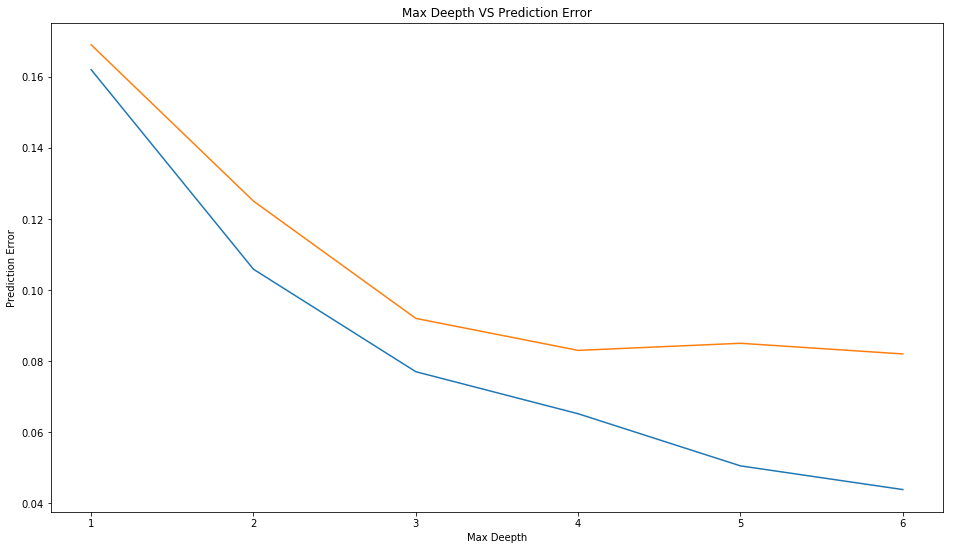

In [11]:
train_err,valid_err=depth_test(train_X,train_Y,valid_X,valid_Y,6)
depth=np.array(range(1,7))
Min_pred_table=pd.DataFrame([[depth[valid_err==min(valid_err)][0],min(valid_err)],[depth[valid_err==min(valid_err)][0],np.array(train_err)[valid_err==min(valid_err)][0]]])
Min_pred_table.columns=['max_pred_err_depth','Error_velue']
Min_pred_table.index=['test_error','train_error']
print(Min_pred_table)
plt.figure(figsize=(16,9))  
plt.plot(depth,train_err)
plt.plot(depth,valid_err)
plt.title('Max Deepth VS Prediction Error')
plt.xlabel('Max Deepth')
plt.ylabel('Prediction Error')
plt.show()

# Load and orgnize data for Minibone

In [12]:
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\Miniboone')
data_r=pd.read_csv(r'MiniBooNE_PID.txt',header=None)
num_Y=data_r.iloc[0,:][0].split(' ')[1:]
Y_1=np.zeros(int(num_Y[0]))+1
Y_0=np.zeros(int(num_Y[1]))
Y=Y_1.tolist()
Y.extend(Y_0.tolist())
X=[]
for i in range(1,data_r.shape[0]):
    a=data_r.iloc[i,0].split(' ')
    temp=[]     
    for j in a:
        if j !=' ' and j!='':
           temp.append(float(j)) 
    X.append(temp)

X=np.array(X)
Y=np.array(Y)

## Build the 4way cross-val function
- for the cross val function also use the key function 
- if the key function changes the key in cross-val function also change

             max_pred_err_depth  Error_velue
test_error                    6     0.102811
train_error                   6     0.100002


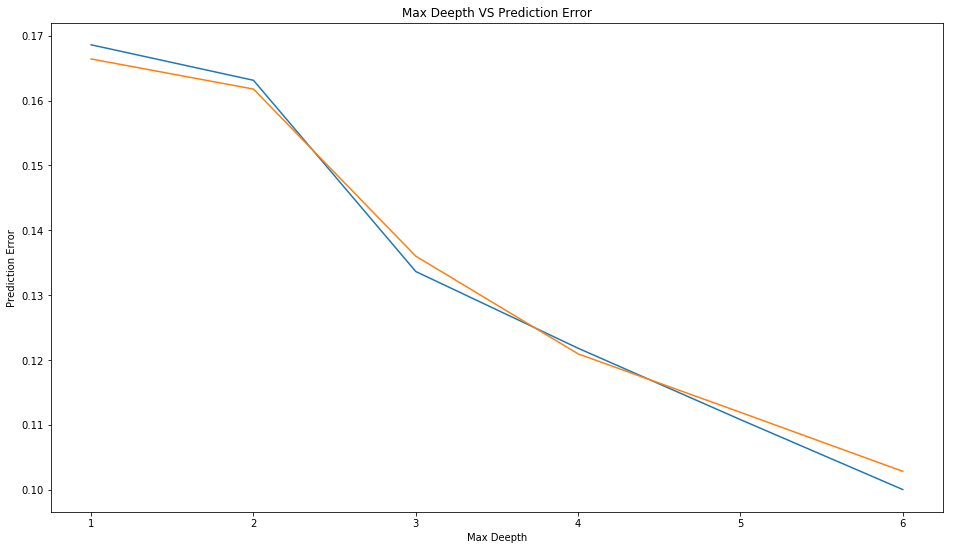

             max_pred_err_depth  Error_velue
test_error                    6     0.098352
train_error                   6     0.096865


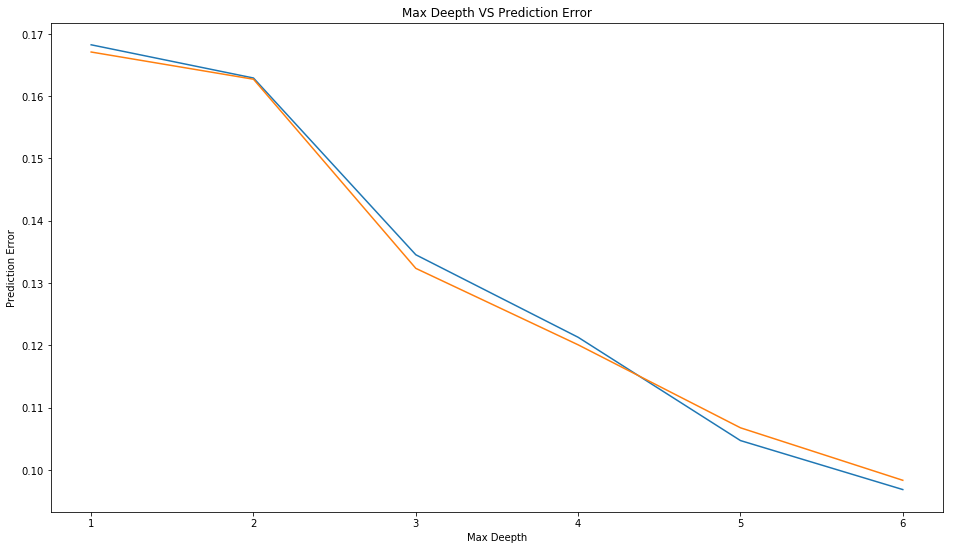

             max_pred_err_depth  Error_velue
test_error                    6     0.099582
train_error                   6     0.096045


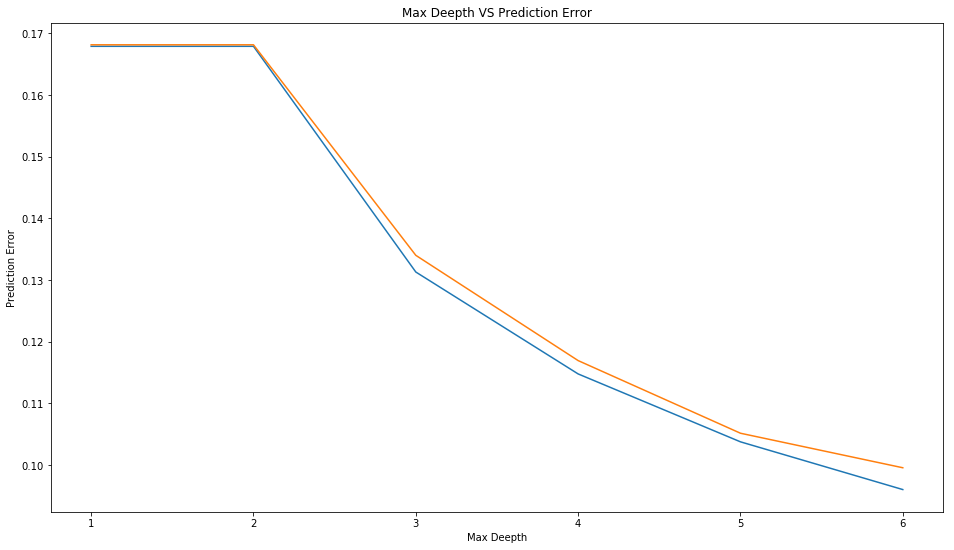

             max_pred_err_depth  Error_velue
test_error                    6     0.102473
train_error                   6     0.094969


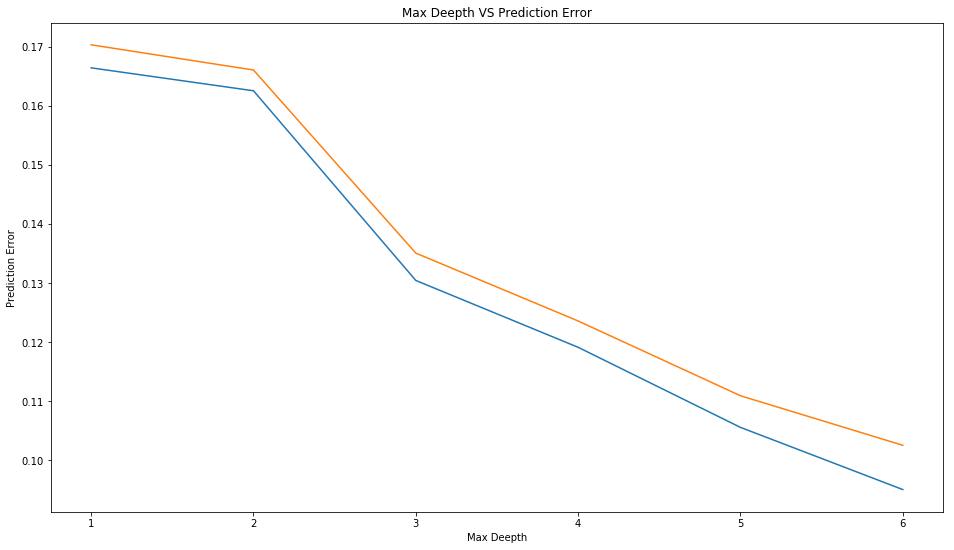

In [16]:
def cross_val(X,Y,max_depth):
    length=int(len(Y)/4)
    rand_ind=np.random.choice(range(len(Y)),size=len(Y), replace=False)
    for i in range(4):
        valid_X=pd.DataFrame(X[rand_ind[length*i:length*(i+1)]])
        valid_Y=pd.DataFrame(Y[rand_ind[length*i:length*(i+1)]])
        train_X=X[rand_ind[0:length*i],:].tolist()
        train_X.extend(X[rand_ind[length*(i+1):]].tolist())
        train_X=pd.DataFrame(train_X)
        train_Y=Y[rand_ind[0:length*i]].tolist()
        train_Y.extend(Y[rand_ind[length*(i+1):]].tolist())
        train_Y=pd.DataFrame(train_Y)
        train_err,valid_err=depth_test(train_X,train_Y,valid_X,valid_Y,max_depth)#this line change with request mathod
        depth=np.array(range(1,max_depth+1))
        Min_pred_table=pd.DataFrame([[depth[valid_err==min(valid_err)][0],min(valid_err)],[depth[valid_err==min(valid_err)][0],np.array(train_err)[valid_err==min(valid_err)][0]]])
        Min_pred_table.columns=['max_pred_err_depth','Error_velue']
        Min_pred_table.index=['test_error','train_error']
        print(Min_pred_table)
        plt.figure(figsize=(16,9))  
        plt.plot(depth,train_err)
        plt.plot(depth,valid_err)
        plt.title('Max Deepth VS Prediction Error')
        plt.xlabel('Max Deepth')
        plt.ylabel('Prediction Error')
        plt.show()

cross_val(X,Y,6)    
    